## Telco Customer Churn Prediction

## Intro

The dataset I've chosen to use for this Homework is the Telco Customer Churn dataset from Kaggle.com. This dataset includes a target variable of churn and I wll be tuning classification models to see which can predict the best churn of a customer. Churn is if a customer leaves or stays with a company. The business best interest is to retain customers. There dataset includes attribute information of the services a customer is signed up for, customer account information, and demographic information about the customer.

Models used and compared will be K-Nearest Neibors, Decision Tree, Random Forest, Suppor Vector Machine (Linear and RBF), Stochastic Gradient Descent, Adaboost, Bagging, Gradient Boosting, ANN, and Stacking.

A few key Metrics to be examined for these will be Accuracy, Recall, R2 and MAE.
Summary and details are provided within code below

## Import Standard Packages


In [1]:
#Load packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import os as os
from sklearn.metrics import mean_squared_error
%matplotlib inline 
import sys
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [2]:
Churn=pd.read_csv(r"C:\Users\17857\OneDrive\Desktop\Predictive Analytics\Telco_churn.csv")

In [3]:
#view the dataset
Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#preview data in easier manner to read
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
Churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
Churn.shape #7043 observations and 21 columns

(7043, 21)

## Preprocess the Dataset

In [7]:
#Remove the CustomerID column. It is uneccesary so do not have to deal with it
#Note: axis=1 denotes that we are referring to a column, not a row
Churn=Churn.drop('customerID',axis=1)
Churn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#check datatypes
Churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Senior citizen should be categorical and total charges should be a float variable
Churn['SeniorCitizen'] = Churn['SeniorCitizen'].astype('object')

In [10]:
#After any attempts for many hours total charges would not convert to object so I am going to drop it so I can move on. This would result in too many dummy variable when converting later on
Churn=Churn.drop('TotalCharges',axis=1)
Churn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [11]:
Churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

## Move target variable Churn to front of dataframe

In [12]:
# designate target variable name & move it to the front of the dataframe
targetName = 'Churn'
#print(targetName)
targetSeries = Churn[targetName] 
#print(targetSeries)
#remove target from current location and insert in column number 0
del Churn[targetName]
Churn.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
Churn.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,No,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,No,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Yes,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,No,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [13]:
#Check for missing values
Churn.isnull().sum() #There are no missing values in the dataset

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

## Transform the data so factors are dummied

Here We are going to do two preprocessing tasks: 1) change the target column to a numeric since many models in Scikit Learn requires integers/numeric; and 2) create dummy variables for the categorical variables

Change target column to numeric since scikit learn models require it

In [14]:
# This code turns a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
Churn['Churn'] = le_dep.fit_transform(Churn['Churn'])

Create dummies for categorical variables

In [15]:
# perform data transformation. Creates dummy variables for categorical variables. 

for col in Churn.columns[1:]:
	attName = col
	dType = Churn[col].dtype
	missing = pd.isnull(Churn[col]).any()
	uniqueCount = len(Churn[attName].value_counts(normalize=False))
	#create dummies
	if dType == object:
		Churn = pd.concat([Churn, pd.get_dummies(Churn[col], prefix=col)], axis=1)
		del Churn[attName]

In [16]:
Churn.shape

(7043, 46)

There are now more rows with dummy variables. Up from 20 to 46

In [17]:
Churn.head()

,Churn,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,2,53.85,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,2,70.70,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


 ## Perform some EDA so to get a feel for the data

In [18]:
Churn.describe()

,Churn,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.371149,64.761692,0.495244,0.504756,0.837853,0.162147,0.516967,0.483033,0.700412,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,0.441561,24.559481,30.090047,0.500013,0.500013,0.368612,0.368612,0.499748,0.499748,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,89.850000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset seems to be evenly split between Male and Female. Also Evenly split on a person having a partner or not. 84% of the customers are not Senior citizens so under the age of 65. Over half the customers pay month to month while the mean monthly bill is $65. 

Check the target variable attributes

Churn
0    5174
1    1869
Name: Churn, dtype: int32


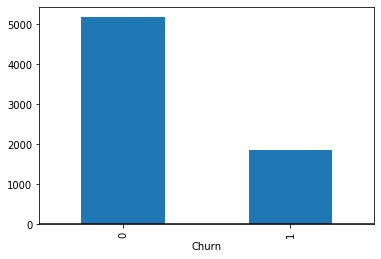

In [19]:
#Basic bar chart since the target is binominal
groupby = Churn.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

In [20]:
# percentage of churn
1869/5174

0.36122922303826827

1869 Customers churned meaning they left the company. This is 36% of the observations. 64% of the customers are staying with the company. The ML model should have better than 36% predictive performance

## Correlation Matrix

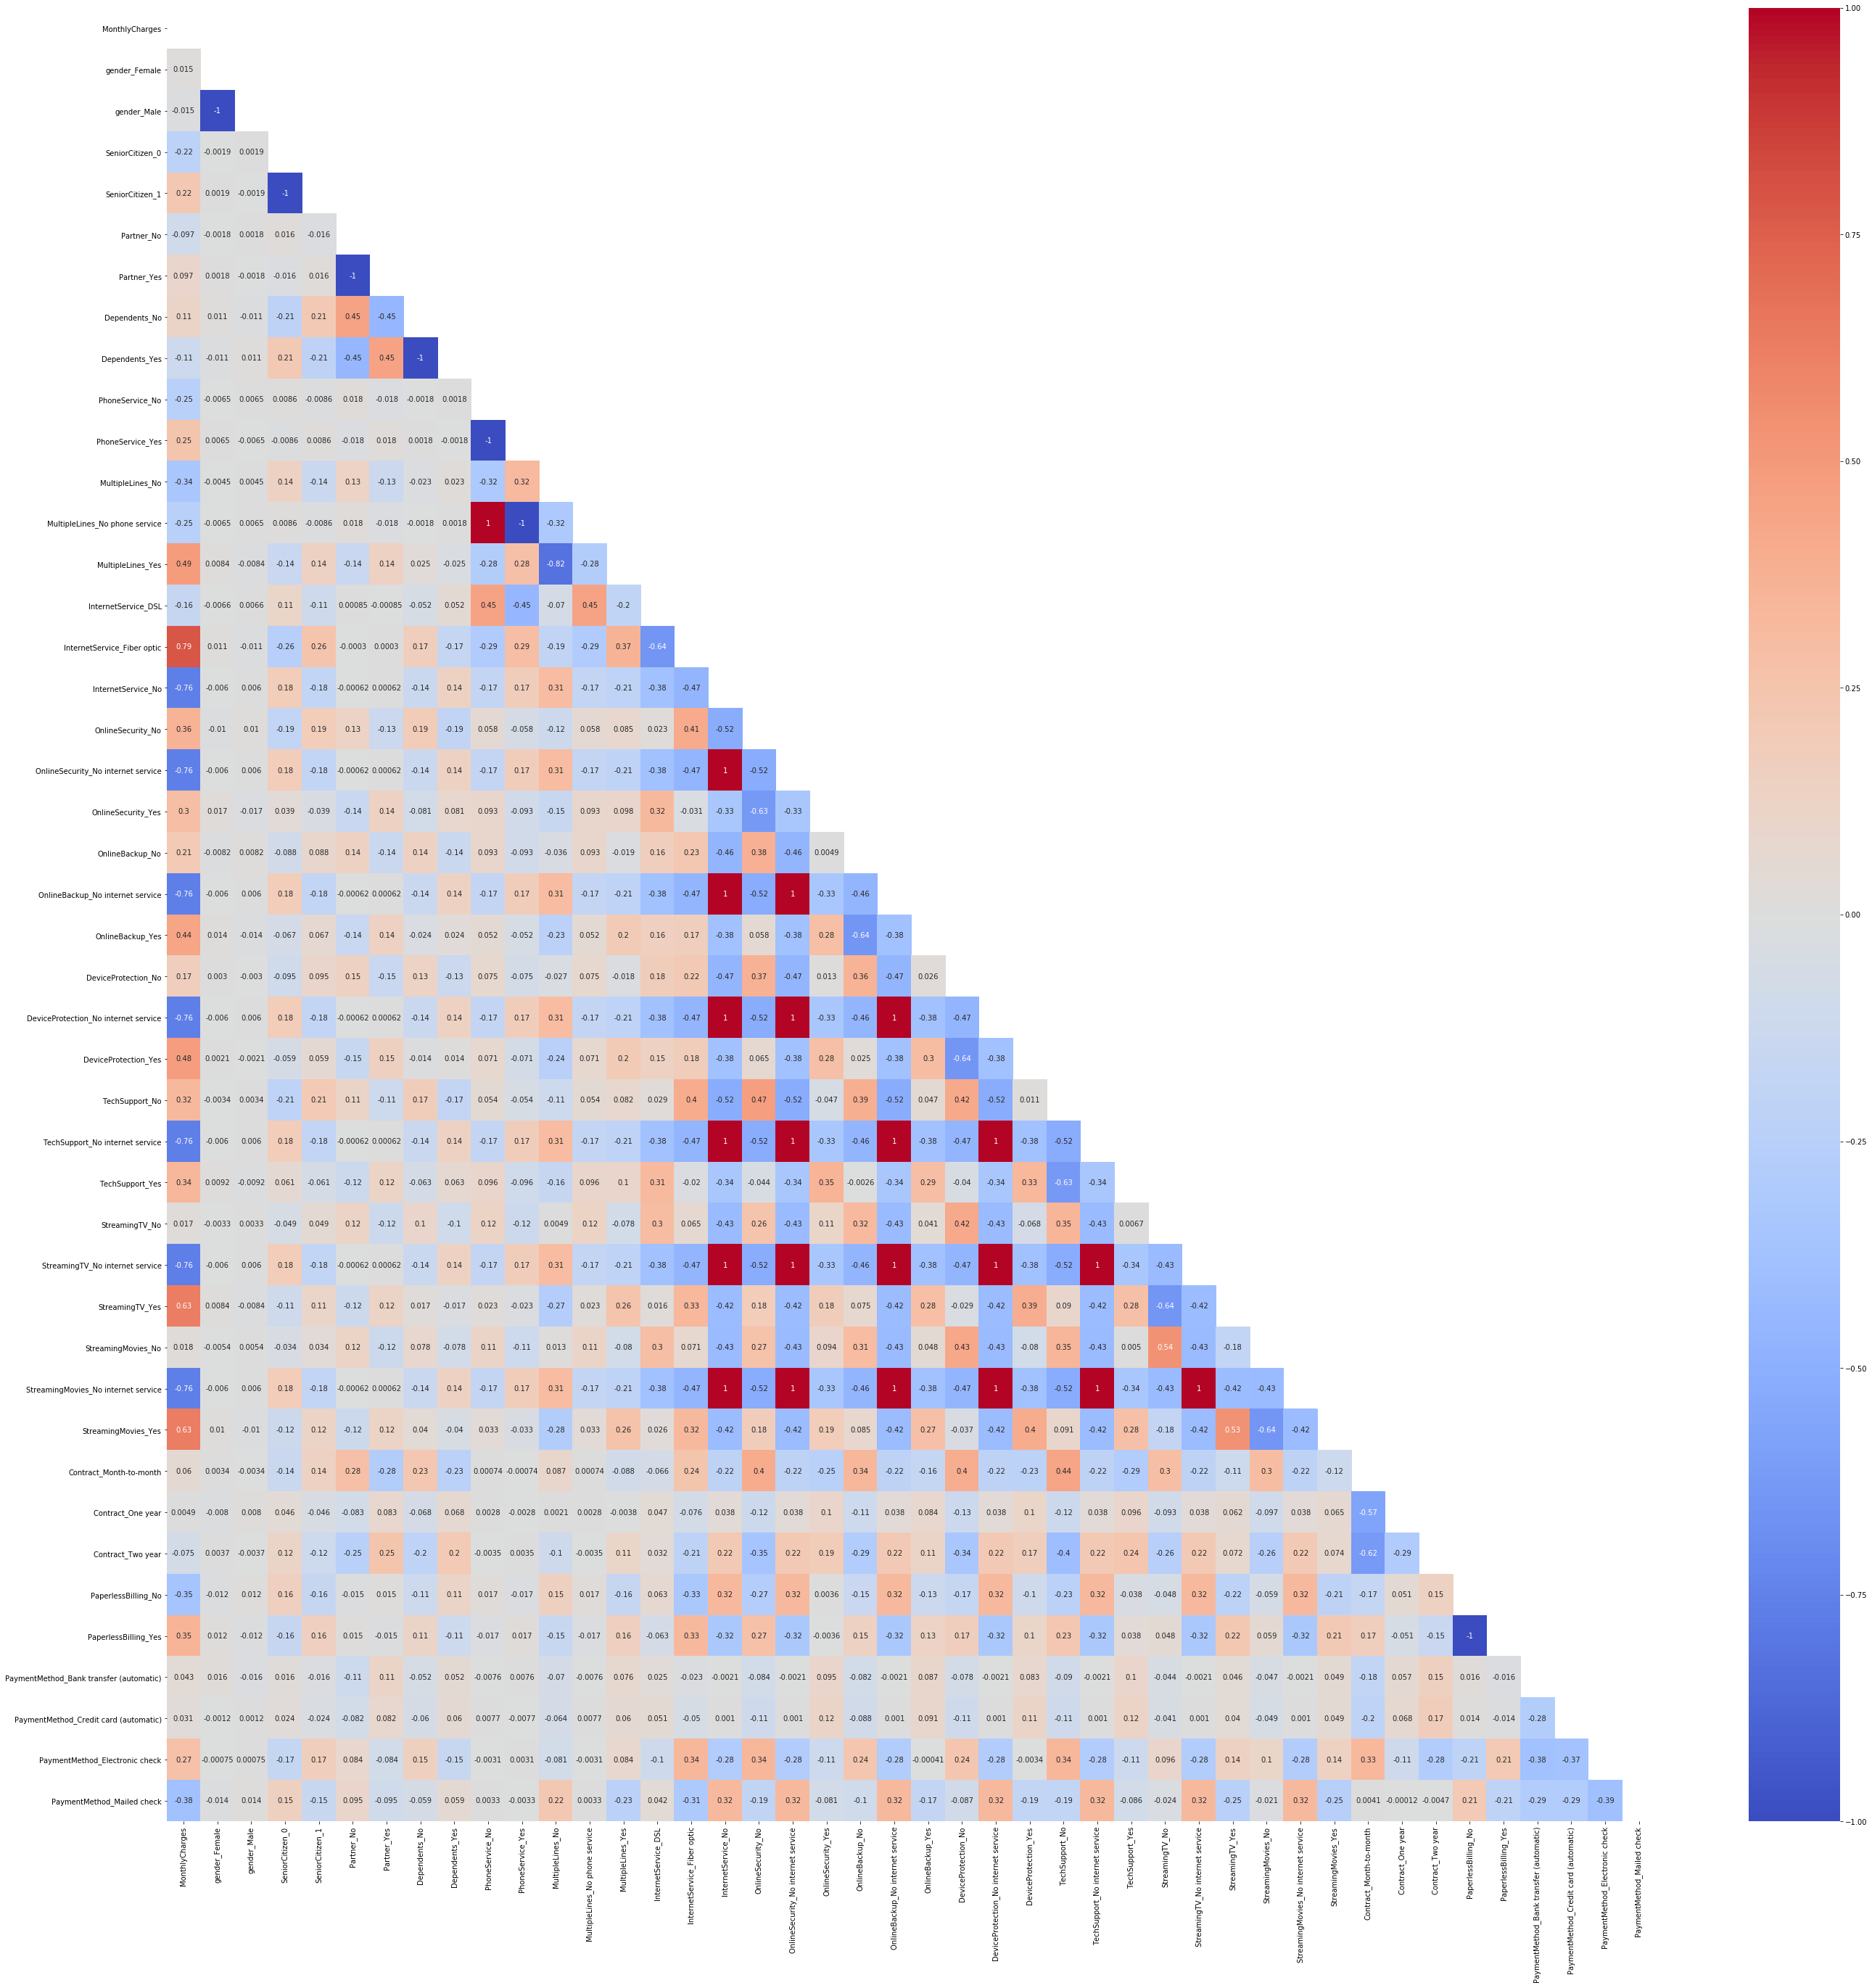

In [21]:
corr_matrix = Churn.iloc[:,2:].corr()
corr_matrix

#code chunk is attributed as follows:
#Shaw, Chris (2019). How to customize seaborn correlation heat map. Medium. 
#Retrieved from https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b.

import seaborn as sns

plt.figure(figsize=(46,46)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

There are a couple correlated variables such as monthly charges along with streaming TVs and Movies. This makes sense as the more services a customer has the higher their bill may be. This is a common theme here the more or less services a customer has correlates with a more positive or negative monthly charge. Also having dependants is correlated with whether or not the customer has a partner as well.

## Tuned Modeling with Classification methods

### Create training and Test sets using 70/30 split

In [22]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
features_train, features_test, target_train, target_test = train_test_split(
    Churn.iloc[:,1:].values, Churn.iloc[:,0].values, test_size=0.30, random_state=0)

In [23]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(2113, 45)
(4930, 45)
(2113,)
(4930,)


## Metrics

Some of the metrics that will be used to evaluate models are as follows

Accuracy score is the most crucial metric in evaluation since it determines how accurate a model is.

R2 is another metric I like to look at. It will show positive and negative correlations in the data

Recall Score shows the true positive positive rate at which the model performs.

MAE will measure the magnitude of errors in the forecast

###  K-Nearest Neighbor (KNN) Modeling and Tuning


Build and make KNN = 3, 5, and 7

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
knn = KNeighborsClassifier(7) #Making KNN=7
print(knn)
print(scaler)

from sklearn.pipeline import make_pipeline
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(7))

#Train model
clf_knn = clf_knn.fit(features_train, target_train)


#Validate model
target_predicted_knn = clf_knn.predict(features_test)


#Classification Report and Confusion Matrix

print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print("R2 Score", r2_score(target_test, target_predicted_knn))
print("Recall Score", recall_score(target_test, target_predicted_knn))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_knn))


print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))


#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
<class 'sklearn.preprocessing._data.StandardScaler'>
KNN Accuracy Score 0.7553241836251775
R2 Score -0.2663107989057356
Recall Score 0.5063291139240507
Mean Abs Error 0.24467581637482252
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1560
           1       0.53      0.51      0.52       553

    accuracy                           0.76      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113

[[1316  244]
 [ 273  280]]
True Negatives:  1316
False Positives:  244
False Negatives:  273
True Positives:  280


The accuracy score on this model is 75%

### Cross Validate

In [25]:
#Cross validate KNN with 10-fold cross validation
scores = cross_val_score(clf_knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [0.76064909 0.77281947 0.76673428 0.74239351 0.74239351 0.7525355
 0.76064909 0.76267748 0.7505071  0.78701826]


0.7598377281947262

#### KNN Results:

I Tuned KNN to 3, 5, and 7 for these three models and the best performance came from the model tuned to 7 KNN with an Accuracy score of 75.5%. This is only slightly better than the other two model with an accuracy score of 73% This model had much better Recall and R2 scores with a lower MAE value. 

## Decision Tree Modeling and Tuning

Build Decision Tree and make max depth = None, 5, 3

In [51]:
#decision tree. Call up my model and name it clf
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier()
#Call up the model to see the parameters you can tune (and their default setting)

clf_dt = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Train the model
clf_dt = clf_dt.fit(features_train, target_train)

#Validate
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

#Classification Report and Confusion Matrix
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print("R2 Score", r2_score(target_test, target_predicted_dt))
print("Recall Score", recall_score(target_test, target_predicted_dt))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))


tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


DT Accuracy Score 0.7936583057264552
R2 Score -0.06791394259748684
Recall Score 0.5877034358047016
Mean Abs Error 0.20634169427354473
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1560
           1       0.61      0.59      0.60       553

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113

[[1352  208]
 [ 228  325]]
True Negatives:  1352
False Positives:  208
False Negatives:  228
True Positives:  325


The best models Accuracy score is 79.4%

In [27]:
#verify DT with 10-fold cross validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()

Cross Validation Score [0.79107505 0.79716024 0.80121704 0.77890467 0.80527383 0.78093306
 0.76267748 0.77484787 0.79310345 0.8336714 ]


0.7918864097363083

### Results:

I Tuned max depth to 3, 5, and None for these three models and the best performance came from the model tuned to 5 max depth with an Accuracy score of 79.2%. This is slightly better than when tuned to 3 it was 78.5% however the default setting was lower at 72%. This model had much better Recall and R2 scores with a lower MAE value. 

## Random Forest Modeling and Tuning

Build Random Forest making max features auto, 5, and 10

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

clf_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Train
clf_rf.fit(features_train, target_train)

#Validate
target_predicted_rf = clf_rf.predict(features_test)

#Classification Report and Confusion Matrix
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print("R2 Score", r2_score(target_test, target_predicted_rf))
print("Recall Score", recall_score(target_test, target_predicted_rf))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))


tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)



RF Accuracy Score 0.8012304779933743
R2 Score -0.028724440116845162
Recall Score 0.5189873417721519
Mean Abs Error 0.19876952200662565
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.52      0.58       553

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1406  154]
 [ 266  287]]
True Negatives:  1406
False Positives:  154
False Negatives:  266
True Positives:  287


The best models Accuracty score is 79.6%

In [29]:
#verify DT with 10-fold cross validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()

Cross Validation Score [0.78904665 0.79716024 0.80121704 0.78296146 0.80527383 0.78093306
 0.76267748 0.77484787 0.79310345 0.8336714 ]


0.7920892494929006

#### Results:

I tuned max features for the random forest model. As max features increased so did the accuracy of the model. The default setting had an accuracy of 77%. Max features at 5 had an accuracy at 79% and at 10 it was 79.6%

### Support Vector Machine (Linear Kernel)

Build SVM using default then tuned to C= 0.01 and C= 0.2

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#Build
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear', C=0.01, random_state=123))
#print(clf_linearSVC)

#Train
clf_linearSVC.fit(features_train, target_train)

#Validate
target_predicted_linearSVC = clf_linearSVC.predict(features_test)

#Classification Report and Confusion Matrix
print("Accuracy Score", accuracy_score(target_test, target_predicted_linearSVC))
print("Recall Score", recall_score(target_test, target_predicted_linearSVC))
print("R2 Score", r2_score(target_test, target_predicted_linearSVC))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_linearSVC))

print(classification_report(target_test, target_predicted_linearSVC))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_linearSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)




Accuracy Score 0.8035967818267865
Recall Score 0.5424954792043399
R2 Score -0.01647772059164465
Mean Abs Error 0.19640321817321343
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1560
           1       0.65      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113

True Negatives:  1398
False Positives:  162
False Negatives:  253
True Positives:  300


The accuracy score for the default model is 69% then 80% then 80.3%

In [31]:
#verify with 10-fold cross validation
#this will take a long time to run! 
scores = cross_val_score(clf_linearSVC, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [0.79918864 0.79716024 0.81541582 0.77890467 0.81744422 0.77890467
 0.78904665 0.78904665 0.78701826 0.84989858]


0.8002028397565922

## Tuning the C parameter (soft margin)


In [32]:
import time
start = time.time()
param_grid={"C": [.01,0.2]} #trying out two different C values.
clf_linearSVC = SVC(kernel='linear', class_weight='balanced')
grid_svm = GridSearchCV(clf_linearSVC, param_grid,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
end = time.time()
print("Time to run", round(end-start), "seconds")

SCORES {'mean_fit_time': array([ 3.18961315, 17.23113465]), 'std_fit_time': array([0.06054432, 2.86264341]), 'mean_score_time': array([0.11840863, 0.06802545]), 'std_score_time': array([0.00749472, 0.01476269]), 'param_C': masked_array(data=[0.01, 0.2],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.2}], 'split0_test_score': array([0.73326572, 0.69878296]), 'split1_test_score': array([0.73326572, 0.70182556]), 'split2_test_score': array([0.73022312, 0.69269777]), 'split3_test_score': array([0.72718053, 0.70182556]), 'split4_test_score': array([0.76064909, 0.72109533]), 'mean_test_score': array([0.73691684, 0.70324544]), 'std_test_score': array([0.01207876, 0.00952699]), 'rank_test_score': array([1, 2])}
BEST SCORE 0.736916835699797
BEST PARAM {'C': 0.01}
Time to run 25 seconds


#### Results

I used the default model which produced an accuracy of 69%. Then as suggested by gridsearch the best c parameter of 0.01 which produced and accuracy of 80.3%. Also the c parameter of 0.2 which was close but produced an accuracy of 80%. The best tuned model was with a C parameter of 0.01

## Support Vector Machine (RBF Kernel)


Build using C = 1 and gamma = 0.01. Then C = 5 and gamma = 0.1. Finally C = 0.1 and gamma = 0.001.

In [63]:
#Build 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma=0.01, random_state=123))


#Train
clf_linearSVC.fit(features_train, target_train)

#Validate
target_predicted_linearSVC = clf_linearSVC.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_linearSVC))
print("Recall Score", recall_score(target_test, target_predicted_linearSVC))
print("R2 Score", r2_score(target_test, target_predicted_linearSVC))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_linearSVC))

print(classification_report(target_test, target_predicted_linearSVC))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_linearSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.7969711310932324
Recall Score 0.47920433996383366
R2 Score -0.05076853526220626
Mean Abs Error 0.20302886890676763
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.48      0.55       553

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.79      2113

True Negatives:  1419
False Positives:  141
False Negatives:  288
True Positives:  265


#### Results:

The best model by a bit was the original model with C = 1 and gamma = 0.01 with an accuracy of 79.7%

## Stochastic Gradient Descent

Build tuned models using loss = log, hinge, and modified_huber

In [67]:
#Build
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
import time

start = time.time()
scaler = StandardScaler
clf_sgd_logit = make_pipeline(StandardScaler(), SGDClassifier(loss='log', random_state=123))


#Train
clf_sgd_logit.fit(features_train, target_train)
end = time.time()
print("Training time is", end-start)

#Validate
target_predicted_sgd_logit = clf_sgd_logit.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_sgd_logit))
print("Recall Score", recall_score(target_test, target_predicted_sgd_logit))
print("R2 Score", r2_score(target_test, target_predicted_sgd_logit))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_sgd_logit))

print(classification_report(target_test, target_predicted_sgd_logit))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_sgd_logit).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Training time is 0.09224843978881836
Accuracy Score 0.7808802650260294
Recall Score 0.5009041591320073
R2 Score -0.13404622803356991
Mean Abs Error 0.21911973497397066
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1560
           1       0.60      0.50      0.54       553

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

True Negatives:  1373
False Positives:  187
False Negatives:  276
True Positives:  277


#### Results:

The best model using loss classifiers came from the log model with an accuracy is 78%. The hinge model is 77.2%. And the modified_huber is 74.3%

## Adaboost (Use at least two different learners)

Build tuned models using depth = 10 learning rate =0.01 n estimators = 50. Then max depth = 1 learning rate =0.1 n estimators = 100. Finally max depth = 1 lr=.2 n estimators = 200

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
clf_dt_ab = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                               algorithm="SAMME.R", n_estimators=200, learning_rate =0.2, random_state=123) 
#Train
clf_dt_ab.fit(features_train, target_train)

#Validate
target_predicted_dt_ab=clf_dt_ab.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_dt_ab))
print("Recall Score", recall_score(target_test, target_predicted_dt_ab))
print("R2 Score", r2_score(target_test, target_predicted_dt_ab))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_dt_ab))

print(classification_report(target_test, target_predicted_dt_ab))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt_ab).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


Accuracy Score 0.8012304779933743
Recall Score 0.5497287522603979
R2 Score -0.028724440116845162
Mean Abs Error 0.19876952200662565
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.64      0.55      0.59       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

True Negatives:  1389
False Positives:  171
False Negatives:  249
True Positives:  304


#### Results:

I used the tuned parameters of max depth = 10 learning rate =0.01 n estimators = 50. Then max depth = 1 learning rate =0.1 n estimators = 100. Finally max depth = 1 lr=.2 n estimators = 200. This final model performed best with an accuracy of 80.1%

## Bagging Classifier (choose at least one learner)

Build tuned models using n estimators 100, 500, 1000

In [73]:
#Build
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(n_estimators=500, random_state=123) 

#Train
clf_bag.fit(features_train, target_train)

#Validate 
target_predicted_clf_bag=clf_bag.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_clf_bag))
print("Recall Score", recall_score(target_test, target_predicted_clf_bag))
print("R2 Score", r2_score(target_test, target_predicted_clf_bag))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_clf_bag))

print(classification_report(target_test, target_predicted_clf_bag))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_clf_bag).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.7799337434926644
Recall Score 0.49547920433996384
R2 Score -0.13894491584364999
Mean Abs Error 0.22006625650733555
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1560
           1       0.60      0.50      0.54       553

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

True Negatives:  1374
False Positives:  186
False Negatives:  279
True Positives:  274


In [37]:
#verify bagging with cross validation
scores_bag = cross_val_score(clf_bag, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_bag)
scores_bag.mean()

Cross Validation Score for each K [0.79716024 0.80527383 0.78904665 0.78093306 0.79918864 0.75456389
 0.76876268 0.76470588 0.78904665 0.79918864]


0.7847870182555781

#### Results

I used the n estimator to tune the model to 100, 500. and 1000. The best model was with n estimator at 500 with an accuracy score of 77.9. But the difference was only in 0.1% each way to the other tuned models.

## Gradient Boosting

Using n estimator 100 and learning rate 0.1. Then n estimator 500 and learning rate 0.0. Finally n estimator 100 and learning rate 0.2

In [77]:
#Build 
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123) #default learning rate is 0.1


#Train
clf_GBC.fit(features_train, target_train)

#Validate
target_predicted_GBC=clf_GBC.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_GBC))
print("Recall Score", recall_score(target_test, target_predicted_GBC))
print("R2 Score", r2_score(target_test, target_predicted_GBC))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_GBC))

print(classification_report(target_test, target_predicted_GBC))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_GBC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.7936583057264552
Recall Score 0.5298372513562387
R2 Score -0.06791394259748684
Mean Abs Error 0.20634169427354473
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1560
           1       0.62      0.53      0.57       553

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113

True Negatives:  1384
False Positives:  176
False Negatives:  260
True Positives:  293


#### Results 

For tuning this model I first used the n estimator of 100, then n estimator of 500. I saw the accuracy went down so I tuned n estimator back to 100 and adjusted the learning rate from the default of .1 to .2. The best model is the originaly model with an n estimator of 100 and learning rate of 0.1 which results in an accuracy of 79.3%

## Extra Trees (Extremely Randomized Trees)


Build using tuned parameter max features default setting, 5, and 10. Then max depth 5, 10. and 3

In [80]:
#Build
from sklearn.ensemble import ExtraTreesClassifier
clf_xdt = ExtraTreesClassifier(n_estimators= 100, n_jobs=-1, random_state=123, max_depth=5)


#Train
clf_xdt.fit(features_train, target_train)

#Validate
target_predicted_xdt=clf_xdt.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_xdt))
print("Recall Score", recall_score(target_test, target_predicted_xdt))
print("R2 Score", r2_score(target_test, target_predicted_xdt))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_xdt))

print(classification_report(target_test, target_predicted_xdt))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_xdt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.7927117841930904
Recall Score 0.4213381555153707
R2 Score -0.07281263040756714
Mean Abs Error 0.20728821580690962
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1560
           1       0.66      0.42      0.52       553

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113

True Negatives:  1442
False Positives:  118
False Negatives:  320
True Positives:  233


#### Results

I began using the tuning parameters of max features using the default setting, 5, then 10. The result were almost identical at 75.6% accuracy score for all these so I decided to see if max depth would make a difference. I did 5, 10, and 3. The best model was tuned to a max depth of 5 with a 79.2% accuracy score

## ANN (different hidden layers and nodes)

Build using hidden layer and nodes of 5, 10, and, 3

In [83]:

#Build
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
scaler = StandardScaler

clf_nn = MLPClassifier(hidden_layer_sizes=(5,5), solver="sgd", learning_rate="adaptive", max_iter=1000,random_state=0)

#Train
clf_nn.fit(features_train, target_train)

#Validate
target_predicted_clf_nn = clf_nn.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_clf_nn))
print("Recall Score", recall_score(target_test, target_predicted_clf_nn))
print("R2 Score", r2_score(target_test, target_predicted_clf_nn))
print("Mean Abs Error", mean_absolute_error(target_test, target_predicted_clf_nn))

print(classification_report(target_test, target_predicted_clf_nn))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_clf_nn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.8045433033601515
Recall Score 0.5171790235081374
R2 Score -0.011579032781564358
Mean Abs Error 0.19545669663984855
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1560
           1       0.66      0.52      0.58       553

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.80      2113

True Negatives:  1414
False Positives:  146
False Negatives:  267
True Positives:  286


#### Results:

For the neural network the best performing model was the one with 5 hidden layers and nodes at 80.4% accuracy rate. I then increased the hidden layers and nodes to 10 but this decreased performance. So finally I decreased to 3 and this also had worse and original performance

## Stacking

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


learner_1 = GaussianNB()
learner_2 = DecisionTreeClassifier()
learner_3 = RandomForestClassifier(max_features='auto', n_estimators=100)
learner_4 = AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME.R",n_estimators=100)

stacked_learner = VotingClassifier(estimators=[('lr', learner_1), ('nb', learner_2), ('rf', learner_3), ('adaboost', learner_4)], voting='hard')

for MV, label in zip([learner_1, learner_2, learner_3, learner_4, stacked_learner], 
                     ['Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost Decision Tree', 'Second Stage Learner']):
    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='recall')
    scores3 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    scores4 = cross_val_score(MV, features_train, target_train, cv=5, scoring='precision')
    scores5 = cross_val_score(MV, features_train, target_train, cv=5, scoring='r2')
    scores6 = cross_val_score(MV, features_train, target_train, cv=5, scoring='neg_mean_absolute_error')
    
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores3.mean(), scores3.std(), label))
    print("R2 Score: %0.2f (+/- %0.2f) [%s]" % (scores5.mean(), scores5.std(), label))
    print("MAE: %0.2f (+/- %0.2f) [%s]" % (scores6.mean(), scores6.std(), label))

Recall: 0.84 (+/- 0.01) [Naive Bayes]
Accuracy: 0.70 (+/- 0.01) [Naive Bayes]
R2 Score: -0.51 (+/- 0.06) [Naive Bayes]
MAE: -0.30 (+/- 0.01) [Naive Bayes]
Recall: 0.50 (+/- 0.02) [Decision Tree]
Accuracy: 0.72 (+/- 0.02) [Decision Tree]
R2 Score: -0.42 (+/- 0.07) [Decision Tree]
MAE: -0.28 (+/- 0.02) [Decision Tree]
Recall: 0.49 (+/- 0.02) [Random Forest]
Accuracy: 0.78 (+/- 0.01) [Random Forest]
R2 Score: -0.12 (+/- 0.09) [Random Forest]
MAE: -0.22 (+/- 0.01) [Random Forest]
Recall: 0.50 (+/- 0.04) [AdaBoost Decision Tree]
Accuracy: 0.76 (+/- 0.02) [AdaBoost Decision Tree]
R2 Score: -0.20 (+/- 0.10) [AdaBoost Decision Tree]
MAE: -0.25 (+/- 0.02) [AdaBoost Decision Tree]
Recall: 0.47 (+/- 0.02) [Second Stage Learner]
Accuracy: 0.77 (+/- 0.01) [Second Stage Learner]
R2 Score: -0.13 (+/- 0.07) [Second Stage Learner]
MAE: -0.23 (+/- 0.01) [Second Stage Learner]


#### Results

When stacking the best stack with an accuracy of 77% is Naive Bayes, Decision Tree, Random Forest, and Adaboost. Some other stacks I experimented with included logistic regression and they and slightly lower accuracy scores performing slightly worse.

## Summary

The chart below shows the comparisons of the evaluation metrics of each of the best model for each classifier. All the classifier models seemed to be pretty consistent throughout with this dataset with top accuracy scores being from 78% to 80.5%. When looking at accuracy the best model is the neural network at 80.45%. The model showing the best recall or true positive rate is the decision tree at 58.78%. I thought recall was pretty low for this dataset but it was consistent throughout the classifier methods. The decsion had the strongest positive correlation at 6.8% but this is fairly weak. The dataset seems to contain a weak negative to no real correlation at all. This is consistent among the classifiers. The best MAE was the Neural network showing the smallest error. 

Overall I think the best model for this dataset is the Neural Network model. It showed the top accuracy which is the main thing I was looking when comparing and also the lowest mean absolute error. It had the third best recall as well.

Some limitiation of this dataset is that it looks at a customers current situation and does not look at behaviors for contribution to churn. Such calls with customer service, If they are aware of competitors, satisfaction with service, and other behavioral data may be useful in better predicting customer churn.

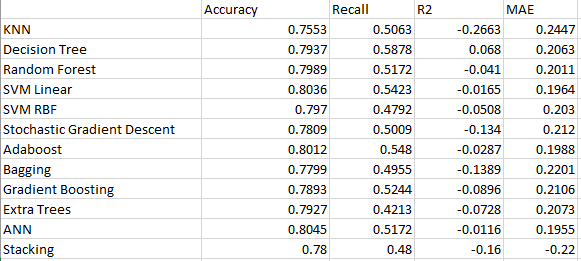